# QCTO - Workplace Module

## Stocking Up on L'Oréal: A Prediction Model
#### Done By: Mahlatse Masemola

© ExploreAI 2024

<div align="center" style="font-size: 50%; text-align: center; margin: 0 auto;">
    <img src="https://cloudfront-us-east-2.images.arcpublishing.com/reuters/3L7GCBXE3ZP6FFQMTUA3J2TARY.jpg" 
         style="display: block; margin-left: auto; margin-right: auto; width: 80%; height: 300px; object-fit: cover;" />
</div>

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Background Information:**
L'Oréal has a diverse portfolio of brands and operates in a highly competitive industry that includes other major players such as Estée Lauder and Coty. The company’s stock price is influenced by a complex interplay of internal factors (like product launches and earnings reports) and external factors (such as macroeconomic indicators and geopolitical events). This project aims to address the challenge of building a predictive model that accounts for this complexity.

* **Purpose:** 
The primary objective of this project is to build a robust machine learning model that predicts the future stock prices of L'Oréal. By leveraging historical stock price data and key financial indicators, the project aims to provide insights into the factors that influence L'Oréal's stock price movements. This predictive model can be used by investors, financial analysts, and other stakeholders to make informed decisions regarding L'Oréal's stock.
* **Details:**
> * <u>Problem Domain and Background:</u> 
L'Oréal, a global leader in the beauty and cosmetics industry, is listed on the Euronext Paris exchange under the ticker symbol "OR.PA." Like other publicly traded companies, L'Oréal's stock price is subject to fluctuations influenced by a multitude of factors, including market trends, company performance, consumer sentiment, and macroeconomic indicators. Predicting these price movements is a complex and challenging task, as the market is inherently volatile and affected by numerous interrelated variables. The project focuses on creating a data-driven approach to forecast L'Oréal’s stock prices by analyzing historical data such as opening prices, closing prices, daily highs and lows, adjusted closing prices, and trading volumes. This historical data provides a foundational understanding of how the stock has behaved over time and enables the development of predictive models that can capture patterns and trends.
> * <u>Project Challenges Addressed:</u>
>> Specific Questions and Challenges:
>>> 1.**Market Volatility:** Understanding and modeling the inherent volatility in L'Oréal's stock price, especially during times of economic uncertainty or significant market events.     
>>> 2.**Data-Driven Insights:** Identifying key financial indicators that have a significant impact on the stock price, such as trading volumes or large fluctuations in daily prices.                    
>>> 3.**Model Performance:** Evaluating the performance of different machine learning models to ensure accurate and reliable predictions that can be used by stakeholders to make investment decisions.
> * <u> Project Related URL's:</u>
>> * Trello Board: https://trello.com/b/2VxjXGsG/cap-stone-project-stocking-up-on-loreal-a-prediction-model                                                                                                 
>>* Github:https://github.com/MahlatseMasemola/L_Oreal_Stock_Price_Prediction_Model
---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [1]:
#Packages required for Data Collection
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta

#Data Manipulation
import numpy as np
from sklearn.preprocessing import StandardScaler

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sn

C:\Users\Mahlatsi\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Describe how the data was collected and provide an overview of its characteristics.
* **Details:** Mention sources of the data, the methods used for collection (e.g., APIs, web scraping, datasets from repositories), and a general description of the dataset including size, scope, and types of data available (e.g., numerical, categorical).
---

**Data Collection:**                                                                                 
The data used in this project was collected using the yfinance library, which allows for easy access to historical stock price data from Yahoo Finance. This library utilizes Yahoo Finance's public API to fetch stock data, ensuring that the information is both accurate and up-to-date. The specific ticker symbol used for L'Oréal is "OR.PA," which represents its listing on the Euronext Paris exchange.The link used to obtain this data is https://finance.yahoo.com/quote/OR.PA/analysis/.

**Characteristics of the Dataset**

The dataset consists of historical stock price data for L'Oréal over the past five years, from 2019-09-23 to 2024-09-19. The following characteristics outline the dataset:
> <u>Size</u>: The dataset contains 1283 rows and 7 columns, representing daily stock prices for the specified time period.                                                                               
> <u>Dictionary</u>: The data consists og various attributes related to the stock's performance, including:
>> 1.Date: The date for each entry.                                                                     
>> 2.Open: The stock price at market opening.                                                           
>> 3.High: The highest stock price during the trading day.                                             
>> 4.Low: The lowest stock price during the trading day.                                               
>> 5.Close: The stock price at market closing.                                                         
>> 6.Volume: The total number of shares traded on that day.                                             
>> 7.Adjusted Close: The closing price adjusted for dividends and stock splits  .

**Types of Data**
The dataset primarily consists of numerical data types, including:
> <u>Numerical</u>: Prices (Open, High, Low, Close, Adjusted Close) and Volume.                       
> <u>Temporal</u>: The Date, which is essential for time series analysis.


---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [2]:
# Ticker symbol for L'Oréal
ticker_symbol = "OR.PA" 

# Calculation of the date five years ago and getting the historical data
end_date = datetime.now()
start_date = end_date - timedelta(days=5*365)
data = yf.download(ticker_symbol, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))
data.reset_index(inplace=True)

# Display the first few rows of the data
data.head().style.set_properties(**{'background-color': 'blue',
                                    'color': 'white',
                                    'border': '1.5px  white'})

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-07 00:00:00,246.699997,248.000000,245.500000,248.000000,228.370941,285778
1,2019-10-08 00:00:00,248.199997,248.899994,244.600006,245.399994,225.976685,378469
2,2019-10-09 00:00:00,245.800003,250.699997,245.199997,247.600006,228.002594,333495
3,2019-10-10 00:00:00,248.199997,248.600006,242.600006,245.300003,225.884644,513066
4,2019-10-11 00:00:00,245.300003,246.100006,241.100006,243.199997,223.950836,685946


---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [3]:
# Create a copy of your DataFrame
data_copy = data.copy()
data_copy.describe().style.set_properties(**{'background-color': 'blue',
                                    'color': 'white',
                                    'border': '1.5px  white'})

,Date,Open,High,Low,Close,Adj Close,Volume
count,1283,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000
mean,2022-04-05 06:19:21.652377088,353.975955,357.374396,350.482346,354.088270,339.279589,404618.049104
min,2019-10-07 00:00:00,205.199997,212.899994,196.000000,207.600006,191.168549,0.000000
25%,2021-01-06 12:00:00,305.900009,308.550003,302.625000,305.650009,285.764618,275065.500000
50%,2022-04-04 00:00:00,362.750000,366.149994,359.149994,363.299988,344.674988,355933.000000
75%,2023-07-04 12:00:00,403.550003,407.200012,400.475006,403.900009,394.769531,461833.500000
max,2024-10-03 00:00:00,457.950012,461.850006,456.149994,456.899994,456.899994,2569157.000000
std,nan,61.205271,61.275913,61.120806,61.110562,65.608672,223865.853074


In [4]:
def data_cleaning(data):
    #1. Handle missing values
    data.dropna(inplace=True)
    
    #2. Handle duplicates
    data.drop_duplicates(inplace=True)
    
    #3. Ensure that the 'Date' column to datetime
    data['Date'] = pd.to_datetime(data['Date'])
    
    #4. Change naming convention from 'Adj Close' to 'Adj_Close'
    data.rename(columns={'Adj Close': 'Adj_Close'}, inplace=True)
    
    return data

# Applying the function to the dataset
data = data_cleaning(data_copy)

# Print number of missing values and duplicates, and data types after data-cleaning
num_missing_values = data_copy.isnull().sum()
num_duplicates = data_copy.duplicated().sum()
data_types = data_copy.dtypes

print(f"Number of missing values:\n{num_missing_values}\n")
print(f"Number of duplicate rows: {num_duplicates}\n")
print("Data Types After Cleaning:")
print(data_types)

Number of missing values:
Date         0
Open         0
High         0
Low          0
Close        0
Adj_Close    0
Volume       0
dtype: int64

Number of duplicate rows: 0

Data Types After Cleaning:
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj_Close           float64
Volume                int64
dtype: object


In [5]:
 # Display the first few rows of the data after data cleaning
data_copy.head().style.set_properties(**{'background-color': 'blue',
                                    'color': 'white',
                                    'border': '1.5px  white'})

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2019-10-07 00:00:00,246.699997,248.000000,245.500000,248.000000,228.370941,285778
1,2019-10-08 00:00:00,248.199997,248.899994,244.600006,245.399994,225.976685,378469
2,2019-10-09 00:00:00,245.800003,250.699997,245.199997,247.600006,228.002594,333495
3,2019-10-10 00:00:00,248.199997,248.600006,242.600006,245.300003,225.884644,513066
4,2019-10-11 00:00:00,245.300003,246.100006,241.100006,243.199997,223.950836,685946


In [6]:
def preprocess_data(df):
    # 1. Handling Outliers
    def handle_outliers(column):
        lower_bound = np.percentile(column, 5)
        upper_bound = np.percentile(column, 95)
        return np.clip(column, lower_bound, upper_bound)
    
    for col in df.select_dtypes(include=[np.number]).columns:
        df[col] = handle_outliers(df[col])
    
    # 2. Feature Scaling: Using StandardScaler to scale features to have mean 0 and variance 1
    scaler = StandardScaler()
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    
    return df

data_copy = preprocess_data(data_copy)


In [7]:
 # Display the first few rows of the data after data preprocessing
data_copy.head().style.set_properties(**{'background-color': 'blue',
                                    'color': 'white',
                                    'border': '1.5px  white'})
   

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2019-10-07 00:00:00,-1.736282,-1.720829,-1.759288,-1.730286,-1.687382,-0.670233
1,2019-10-08 00:00:00,-1.736282,-1.720829,-1.759288,-1.730286,-1.687382,-0.078630
2,2019-10-09 00:00:00,-1.736282,-1.720829,-1.759288,-1.730286,-1.687382,-0.365678
3,2019-10-10 00:00:00,-1.736282,-1.720829,-1.759288,-1.730286,-1.687382,0.780439
4,2019-10-11 00:00:00,-1.736282,-1.720829,-1.759288,-1.730286,-1.687382,1.883851


In [8]:
def feature_engineering(df):
    # Moving Average
    df['SMA_20'] = df['Close'].rolling(window=20).mean()
    
    # Lagged Feature
    df['Lag_Close'] = df['Close'].shift(1)
    
    # Drop NaN values generated by moving average and lag
    df.dropna(inplace=True)
    
    return df

 # Display the first few rows of the data after feature engineering
data_copy = feature_engineering(data_copy)
data_copy.head().style.set_properties(**{'background-color': 'blue',
                                    'color': 'white',
                                    'border': '1.5px  white'})

,Date,Open,High,Low,Close,Adj_Close,Volume,SMA_20,Lag_Close
19,2019-11-01 00:00:00,-1.538870,-1.562490,-1.529758,-1.574536,-1.553901,-0.568878,-1.703487,-1.551064
20,2019-11-04 00:00:00,-1.568984,-1.592554,-1.541494,-1.572859,-1.552464,0.264680,-1.695615,-1.574536
21,2019-11-05 00:00:00,-1.565638,-1.575852,-1.528081,-1.527592,-1.513670,0.453060,-1.685481,-1.572859
22,2019-11-06 00:00:00,-1.527159,-1.545788,-1.499578,-1.497415,-1.487808,0.203733,-1.673837,-1.527592
23,2019-11-07 00:00:00,-1.492026,-1.537436,-1.497902,-1.517533,-1.505049,0.490660,-1.663200,-1.497415


In [9]:
#Saving the data as a csv file
data_copy.to_csv('LOreal Stock Price Cleaned Data.csv')

---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


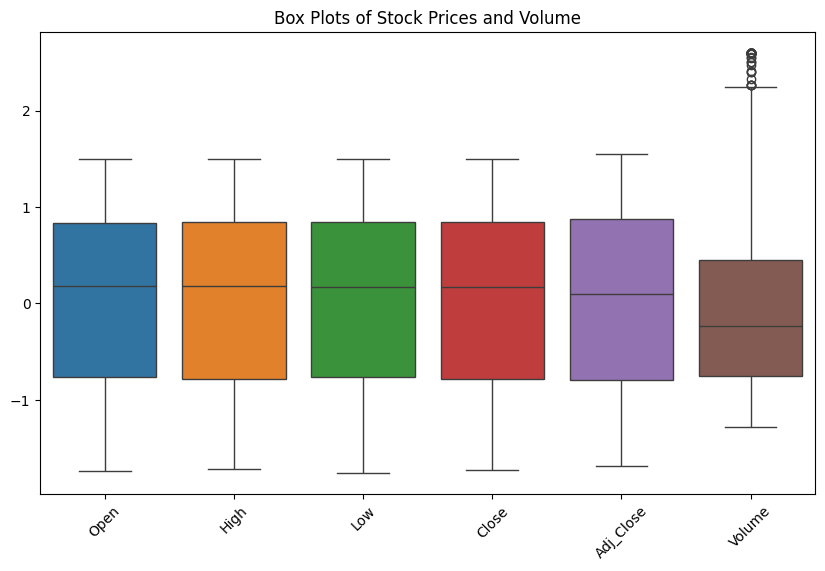

In [20]:
columns_to_plot = ['Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume']

plt.figure(figsize=(10, 6))

sns.boxplot(data=data_copy[columns_to_plot])
plt.title('Box Plots of Stock Prices and Volume')
plt.xticks(rotation=45) 
plt.show()


**Insights:**

> <u> Price columns (Open, High, Low, Close, Adj_Close): </u> 
These columns show a fairly symmetrical distribution with no significant outliers. The medians for these price-related features are around the center of the boxes, indicating a balanced distribution. The whiskers are of similar length, meaning the data does not exhibit extreme variations.
> <u> Volume: </u>
This feature has noticeable outliers (represented as small circles) above the upper whisker, indicating that on some trading days, the volume of L'Oréal stock traded was significantly higher than usual. The interquartile range (IQR) is quite wide, reflecting variability in trading volumes, and the data has a right-skewed distribution due to these outliers.

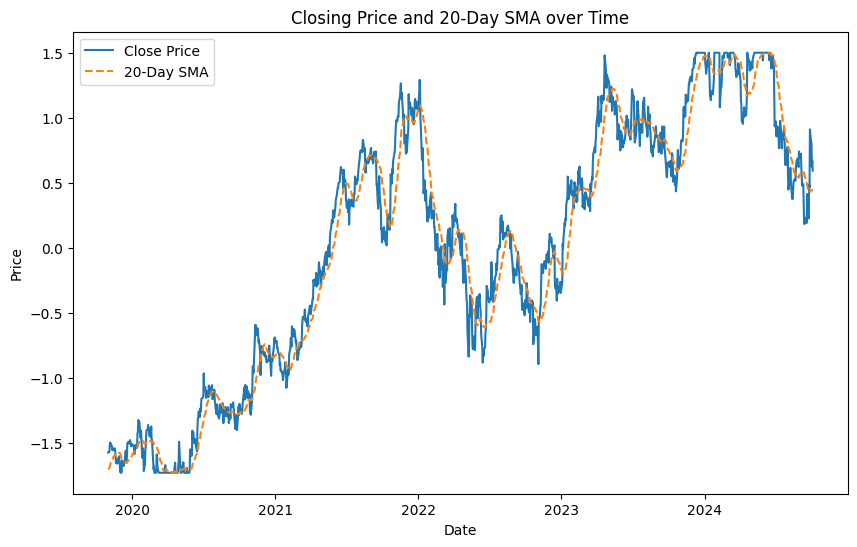

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(data_copy['Date'], data_copy['Close'], label='Close Price')
plt.plot(data_copy['Date'], data_copy['SMA_20'], label='20-Day SMA', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Closing Price and 20-Day SMA over Time')
plt.legend()
plt.show()

**Insights:**

> <u> In this time series plot:</u>

>> 1. Blue Line (Closing Price):
>>> * The blue line represents the normalized closing price of L'Oréal's stock over time, from around late 2019 to 2024.
>>> * The price shows cyclical patterns, with several peaks and troughs.
>>> * There is a steady increase in the price between 2020 and 2022, followed by some volatility starting in 2022 with noticeable ups and downs.

>> 2.Orange Dotted Line (20-Day SMA):
>>> * The orange line shows the 20-day Simple Moving Average (SMA), which smooths out short-term fluctuations in the stock price and provides a clearer trend direction.
>>> * The SMA follows the general direction of the closing price but with less short-term volatility.
>>> * In periods of rapid price increases or decreases, the SMA lags slightly behind the actual closing price due to its smoothing effect.


> <u> Key Observations:</u>
>> * 2020-2022: There's a strong upward trend with the closing price steadily increasing, and the 20-day SMA closely follows this trend.
>> * 2022-2023: The price becomes more volatile, with a significant drop around mid-2022 followed by a recovery and then another dip.
>> * 2023-2024: After reaching a high point, the stock undergoes some corrections and fluctuations, but the SMA still captures the broader trend of movement.

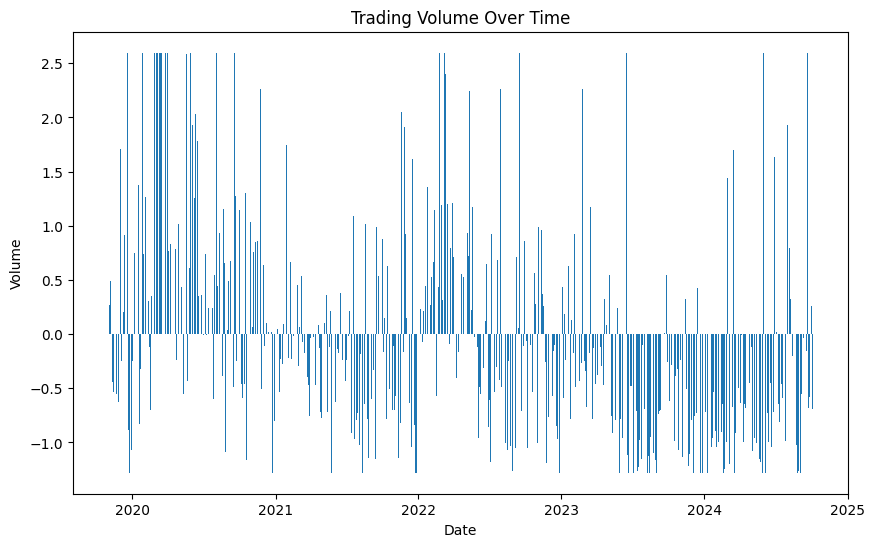

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(data_copy['Date'], data_copy['Volume'])
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Trading Volume Over Time')
plt.show()

**Insights**
<u> Key Observations:</u>
> * 2020-2021: There are higher fluctuations in volume, suggesting frequent changes in trading activity during these years. The spikes indicate certain periods when trading volume surged.
> * 2022-2023: There is still volatility, though the trading volume seems to dip at certain periods, indicating less intense trading activity overall.
> * 2024 and beyond: The fluctuations continue, with alternating periods of high and low volume, which suggests that trading activity remains dynamic but inconsistent.

               Date      Open      High       Low     Close  Adj_Close  \
Date       1.000000  0.843879  0.846423  0.840616  0.843322   0.881807   
Open       0.843879  1.000000  0.998891  0.998760  0.997493   0.993817   
High       0.846423  0.998891  1.000000  0.998624  0.998944   0.995146   
Low        0.840616  0.998760  0.998624  1.000000  0.998799   0.994737   
Close      0.843322  0.997493  0.998944  0.998799  1.000000   0.995874   
Adj_Close  0.881807  0.993817  0.995146  0.994737  0.995874   1.000000   
Volume    -0.397183 -0.476426 -0.465089 -0.488828 -0.476671  -0.478016   
SMA_20     0.858689  0.984081  0.984187  0.982287  0.982154   0.983048   
Lag_Close  0.843987  0.998902  0.997904  0.997756  0.996465   0.992946   

             Volume    SMA_20  Lag_Close  
Date      -0.397183  0.858689   0.843987  
Open      -0.476426  0.984081   0.998902  
High      -0.465089  0.984187   0.997904  
Low       -0.488828  0.982287   0.997756  
Close     -0.476671  0.982154   0.996465  
A

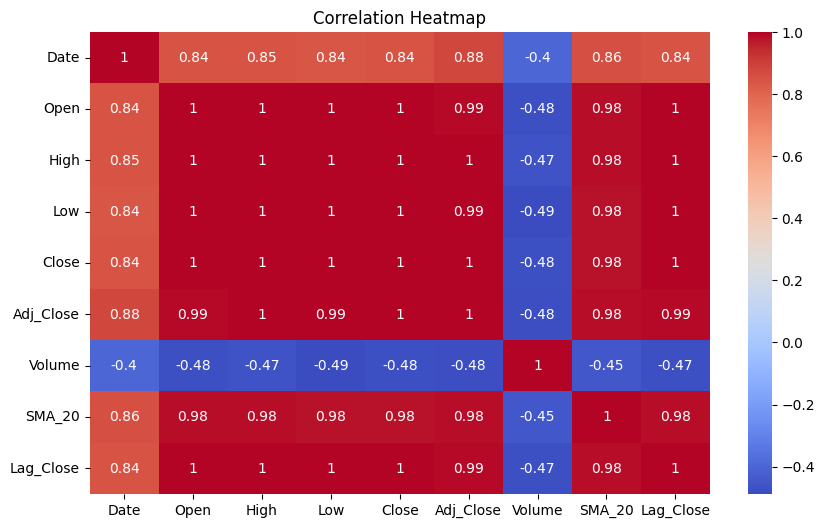

In [13]:
correlation_matrix = data_copy.corr()
print(correlation_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Insights:**

> <u>Strong Positive Correlations:</u>
>> * Open, High, Low, Close, and Adj_Close: These variables exhibit very strong positive correlations with each other, which is expected as they represent different price points of the same asset.
>> * SMA_20 and Lag_Close: These variables also show strong positive correlations, suggesting that the 20-day Simple Moving Average (SMA) is closely related to the previous day's closing price.

> <u>Negative Correlation:</u>
>> * Volume and other variables: Volume has a negative correlation with all other variables, indicating that when the price of the asset is rising or falling, the trading volume tends to decrease.

> <u>Weak Correlations:</u>
>> * Date and other variables: The correlation between Date and other variables is generally weak, suggesting that the time factor has a limited impact on the price movements of the asset.

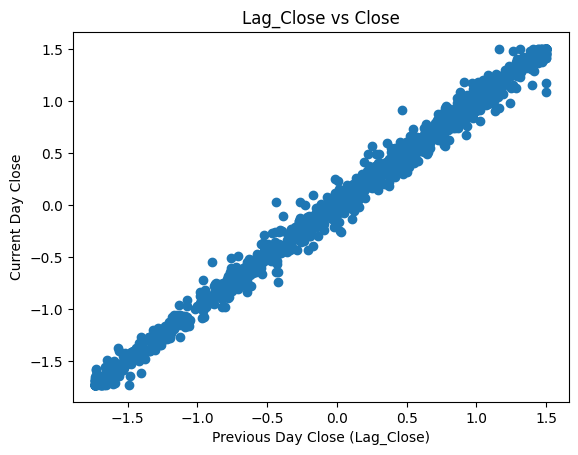

In [14]:
plt.scatter(data_copy['Lag_Close'], data_copy['Close'])
plt.xlabel('Previous Day Close (Lag_Close)')
plt.ylabel('Current Day Close')
plt.title('Lag_Close vs Close')
plt.show()

**Insights:**
> * <u>Strong Positive Correlation:</u> The points in the scatter plot are clustered along a diagonal line with a positive slope, indicating a strong positive correlation between the two variables. This means that when the previous day's closing price is high, the current day's closing price is also likely to be high, and vice versa.
> * <u>Linear Relationship:</u> The points appear to follow a linear trend, suggesting that the relationship between the two variables can be approximated by a straight line. This is consistent with the strong positive correlation observed.
> * <u>No Outliers:</u> There are no obvious outliers or points that deviate significantly from the general trend, suggesting that the relationship is relatively stable.

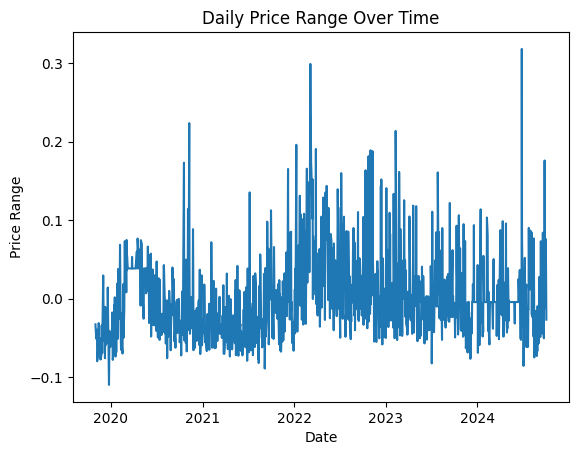

In [15]:
data_copy['Price_Range'] = data_copy['High'] - data_copy['Low']

plt.plot(data_copy['Date'], data_copy['Price_Range'])
plt.xlabel('Date')
plt.ylabel('Price Range')
plt.title('Daily Price Range Over Time')
plt.show()

**Insights**
> * <u>Volatility:</u> The price range fluctuates significantly over time, indicating a volatile market. There are periods of high volatility with large price swings, as well as periods of low volatility with smaller price movements.
> * <u>No Clear Trend:</u> There is no clear upward or downward trend in the price range over the entire period. The chart shows a mix of upward and downward movements.
> * <u>Seasonal Patterns:</u> It is possible that there are seasonal patterns in the price range, but it is difficult to identify them clearly from this chart. More data and analysis would be needed to confirm any seasonal trends.

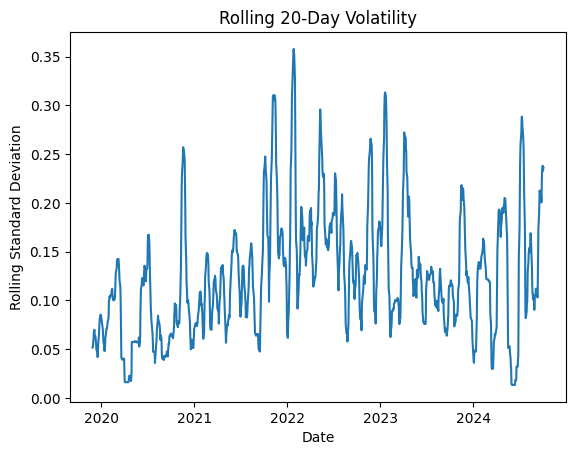

In [18]:
data_copy['Rolling_Std'] = data_copy['Close'].rolling(window=20).std()

plt.plot(data_copy['Date'], data_copy['Rolling_Std'])
plt.xlabel('Date')
plt.ylabel('Rolling Standard Deviation')
plt.title('Rolling 20-Day Volatility')
plt.show()

**Insights:**
> * <u>Volatility Fluctuations:</u> The volatility fluctuates significantly over time, indicating periods of high and low volatility. There are periods of sustained high volatility, as well as periods of relative calm.
> * <u>Clustering:</u> There are periods where the volatility appears to cluster together, suggesting that there may be underlying factors that are driving the volatility.

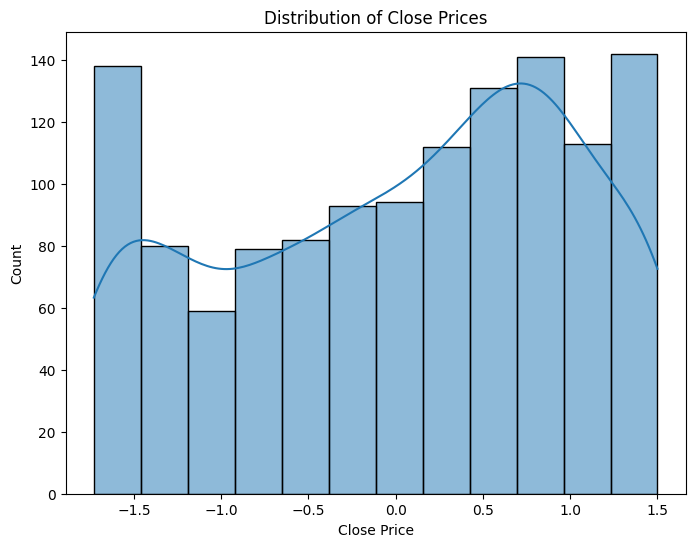

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(data_copy['Close'], kde=True)
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.show()

**Insights:**
> * <u>Skewness:</u> The distribution is slightly skewed to the left, indicating that there are more observations on the higher end of the closing price range.
> * <u>Multimodality:</u> The histogram shows multiple peaks, suggesting that there may be multiple modes or clusters of data points. This could indicate different market regimes or underlying factors influencing the closing prices.

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
